JUICE RPWI HK Plot

2024-04-22 F. Tsuchiya

In [1]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ['CDF_LIB'] = 'C:/Program Files/CDF_Distribution/cdf39_0-dist/lib'

Libs

In [2]:
import sys

# import JUICE lib
sys.path.append('./lib/')

# import juice_lib
import juice_cdf_lib as juice_cdf


User program

(1) read CDF files

In [3]:
date='20230713'
base_dir = '/Users/user/OneDrive-Univ/data/data-JUICE/datasets/'
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'
deploy = 0  # Deplot-HK flag

data_hf, err_hf = juice_cdf.juice_read_cdfs(
    date, 'LWYHK00032', base_dir=base_dir)
data_dpu, err_dpu = juice_cdf.juice_read_cdfs(
    date, 'LWYHK00064', base_dir=base_dir)
data_lvps, err_lvps = juice_cdf.juice_read_cdfs(
    date, 'LWYHK00080', base_dir=base_dir)

if err_hf == 0: 
    hk_hf = juice_cdf.juice_gethk_hf(data_hf)
if err_dpu == 0:
    hk_dpu = juice_cdf.juice_gethk_dpu(data_dpu)
if err_lvps == 0:
    hk_lvps = juice_cdf.juice_gethk_lvps(data_lvps)


(2) Plot HK values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


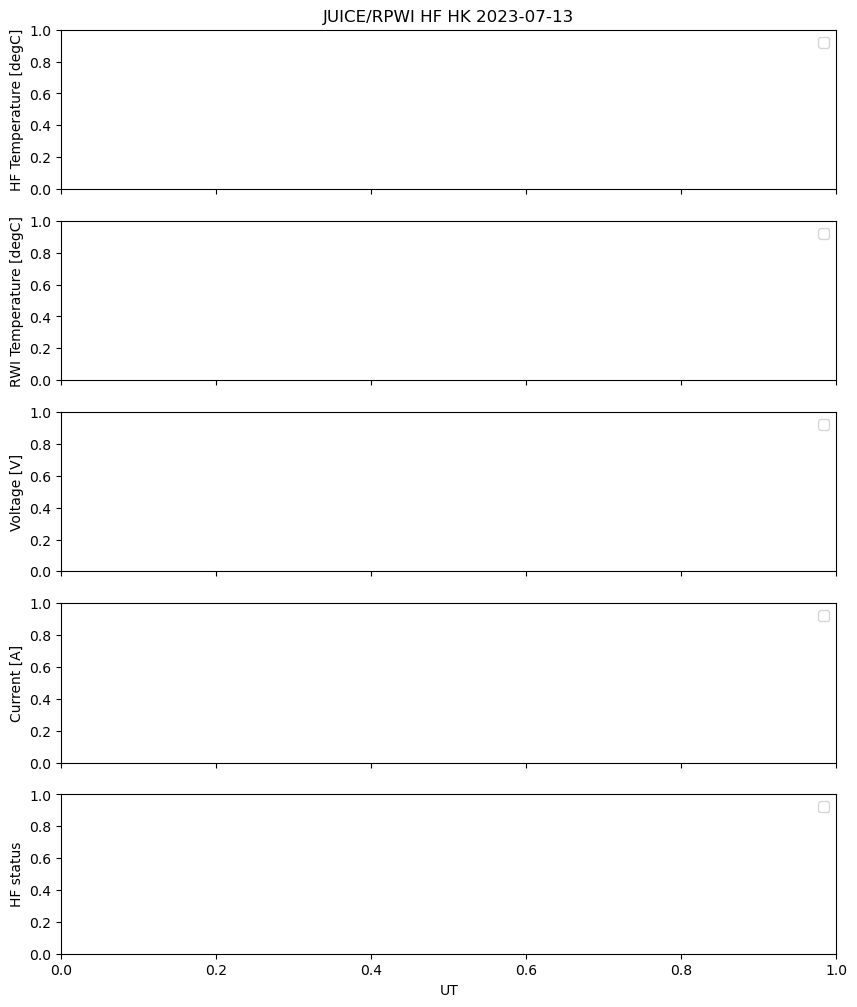

In [4]:
import matplotlib.pyplot as plt
import numpy as np

title_label = 'JUICE/RPWI HF HK ' + date[0:4] + '-' + date[4:6] + '-' + date[6:8]
if deploy == 1:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(
        6, figsize=(10.0, 12.0), sharex=True)
else:
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(
        5, figsize=(10.0, 12.0), sharex=True)

if err_hf == 0:
    temp_lim = [-150.0, 100.0]
    temp_rwi_u = np.where((hk_hf.temp_rwi_u < temp_lim[0]) |
                          (hk_hf.temp_rwi_u > temp_lim[1]), np.nan, hk_hf.temp_rwi_u)
    temp_rwi_w = np.where((hk_hf.temp_rwi_w < temp_lim[0]) |
                          (hk_hf.temp_rwi_w > temp_lim[1]), np.nan, hk_hf.temp_rwi_w)
    temp_hf_fpga = np.where((hk_hf.temp_hf_fpga < temp_lim[0]) |
                            (hk_hf.temp_hf_fpga > temp_lim[1]), np.nan, hk_hf.temp_hf_fpga)

#-----------------------------------------------------------------
if err_hf == 0:
    ax1.plot(hk_hf.epoch, temp_hf_fpga, '.:r', label='HF(FPGA)')
if err_dpu == 0:
    ax1.plot(hk_dpu.epoch, hk_dpu.hf_temp, '.:c', label='HF(PCB)')

ax1.set_ylabel('HF Temperature [degC]')
ax1.legend()
ax1.set_title(title_label)

#-----------------------------------------------------------------
if err_hf == 0:
    ax2.plot(hk_hf.epoch, temp_rwi_u, '.:g', label='RWI U')
    ax2.plot(hk_hf.epoch, temp_rwi_w, '.:b', label='RWI W')

ax2.set_ylabel('RWI Temperature [degC]')
ax2.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_33, '.:r', label='HF 3.3V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_85, '.:g', label='HF 8.5V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.hf_on_off, '.:k', label='HF ON/OFF (LVPS)')
ax3.set_ylabel('Voltage [V]')
ax3.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax4.plot(hk_lvps.epoch, hk_lvps.cur_hf_33, '.:r', label='HF 3.3V (LVPS)')
    ax4.plot(hk_lvps.epoch, hk_lvps.cur_hf_85*10, '.:g', label='HF 8.5V (LVPS) [x10]')

ax4.set_ylabel('Current [A]')
ax4.legend()

#-----------------------------------------------------------------
if err_hf == 0:
    ax5.plot(hk_hf.epoch, hk_hf.heater_ena,
             '.:r', label='Heater ENA')
    ax5.plot(hk_hf.epoch, hk_hf.calsig_ena+1.5,
             '.:b', label='Cal signal ENA')

ax5.set_ylabel('HF status')
ax5.legend()

if deploy == 0:
    ax5.set_xlabel('UT')
else:
    #-----------------------------------------------------------------
    if err_hf == 0:
        ax6.plot(hk_hf.epoch, hk_hf.deploy_pri_x,
                '.:r', label='DEPLOY X PRI')
        ax6.plot(hk_hf.epoch, hk_hf.deploy_red_x,
                '.-r', label='DEPLOY X RED')
        ax6.plot(hk_hf.epoch, hk_hf.deploy_pri_y+1.5,
                '.:g', label='DEPLOY Y PRI')
        ax6.plot(hk_hf.epoch, hk_hf.deploy_red_y+1.5,
                '.-g', label='DEPLOY Y RED')
        ax6.plot(hk_hf.epoch, hk_hf.deploy_pri_z+3,
                '.:b', label='DEPLOY Z PRI')
        ax6.plot(hk_hf.epoch, hk_hf.deploy_red_z+3,
                '.-b', label='DEPLOY Z RED')
    ax6.set_xlabel('UT')
    ax6.set_ylabel('Deployment status')
    ax6.legend()

png_fname = work_dir+'RPWI_HF_HK_'+date+'.png'
fig.savefig(png_fname)

# print(hk_lvps.cur_hf_33[300:500])
# print(hk_lvps.cur_hf_85[300:500])